In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scFunctions as sf
import pickle

%config Completer.use_jedi = False

In [2]:
with open("../data/adata_new_orig.pickle", 'rb') as f:
    adata = pickle.load(f)

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


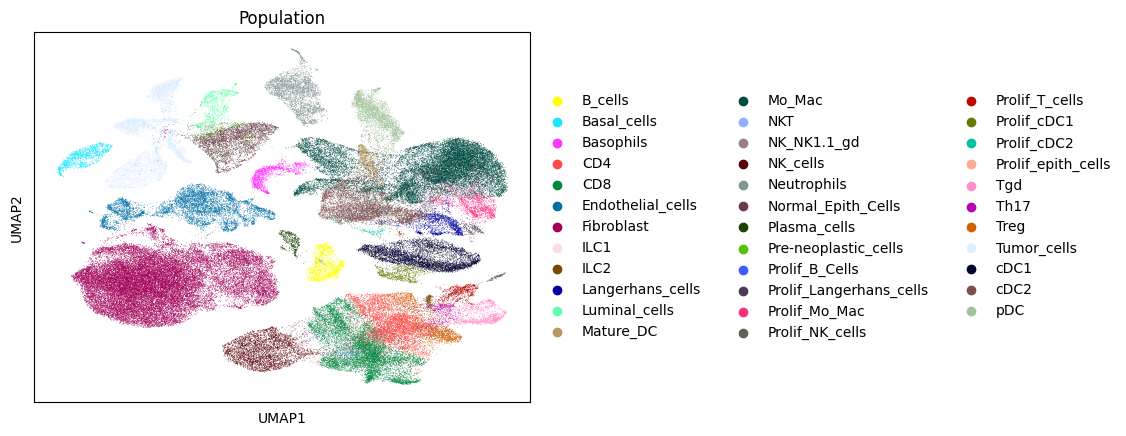

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


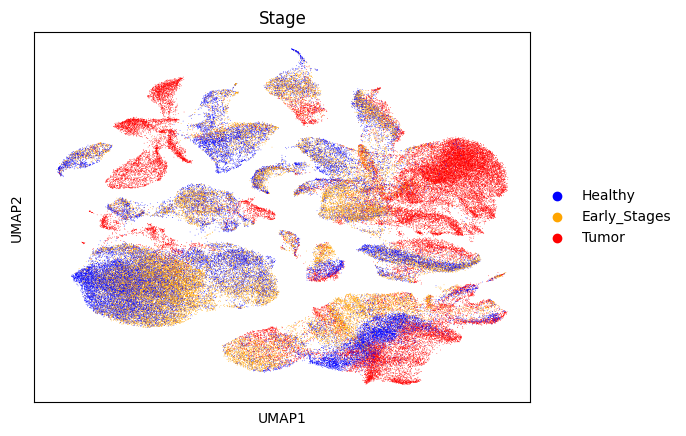

In [16]:
sc.pl.umap(adata, color = "Population")
sc.pl.umap(adata, color = "Stage")

In [134]:
np.unique(adata.obs.Population)

array(['B_cells', 'Basal_cells', 'Basophils', 'CD4', 'CD8',
       'Endothelial_cells', 'Fibroblast', 'ILC1', 'ILC2',
       'Langerhans_cells', 'Luminal_cells', 'Mature_DC', 'Mo_Mac', 'NKT',
       'NK_NK1.1_gd', 'NK_cells', 'Neutrophils', 'Normal_Epith_Cells',
       'Plasma_cells', 'Pre-neoplastic_cells', 'Prolif_B_Cells',
       'Prolif_Langerhans_cells', 'Prolif_Mo_Mac', 'Prolif_NK_cells',
       'Prolif_T_cells', 'Prolif_cDC1', 'Prolif_cDC2',
       'Prolif_epith_cells', 'Tgd', 'Th17', 'Treg', 'Tumor_cells', 'cDC1',
       'cDC2', 'pDC'], dtype=object)

In [183]:
liste_B = ["Normal_Epith_Cells", "Pre-neoplastic_cells", "Tumor_cells"]

adata_B = adata[adata.obs['Population'].isin(liste_B), :].raw.to_adata().copy()
adata_B

# 1760 cells

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/anndata/_core/raw.py:139: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return anndata.AnnData(


AnnData object with n_obs × n_vars = 9743 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)', 'new_orig'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'Stage_colors', 'neighbors', 'umap', 'new_orig_colors', 'Population_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


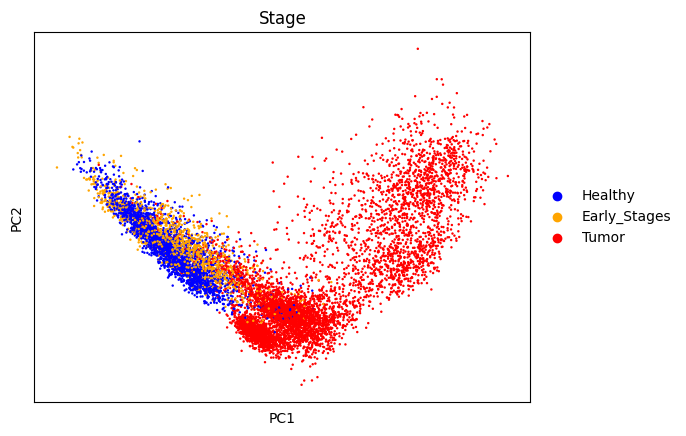

In [184]:
adata_B = sf.pp_PCA(adata_B) # Function defined in scFunctions.py

# Normalize, Log-transform, select HVG, scale data and perform PCA

sc.pl.pca(adata_B, color = "Stage")

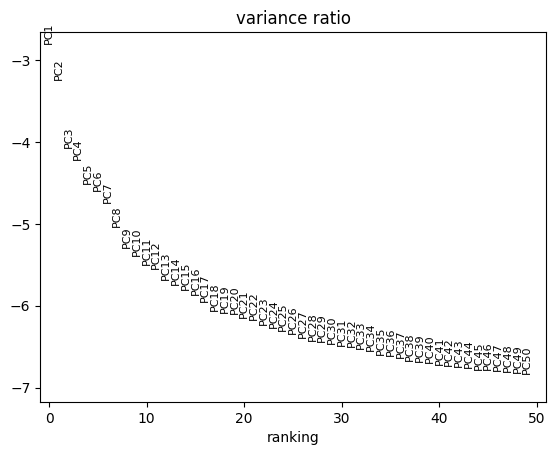

In [185]:
sc.pl.pca_variance_ratio(adata_B, log=True, n_pcs = 50) #ndim = 50

In [186]:
cell_cycle_genes = [x.strip().capitalize() for x in open('../data/regev_lab_cell_cycle_genes.txt')]

In [187]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata_B.var_names]

In [188]:
sc.tl.score_genes_cell_cycle(adata_B, s_genes=s_genes, g2m_genes=g2m_genes)

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


In [189]:
sc.pp.regress_out(adata_B, ['S_score', 'G2M_score'])
sc.pp.scale(adata_B)

In [190]:
sc.tl.pca(adata_B)

In [191]:
sc.pp.neighbors(adata_B, n_pcs=30)
sc.tl.umap(adata_B)

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


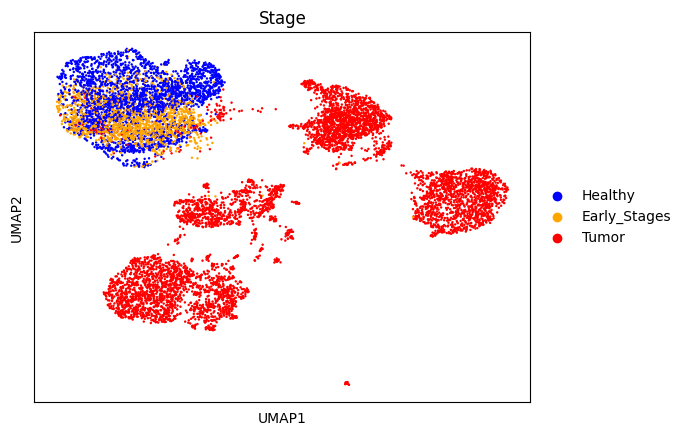

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


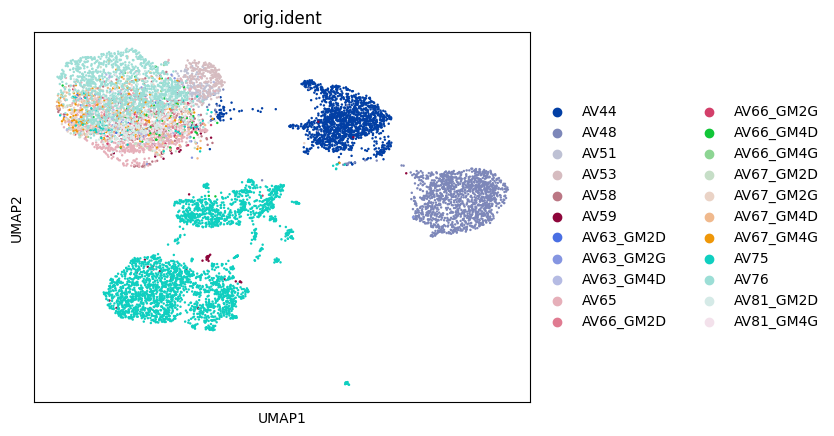

/Users/mscavino/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


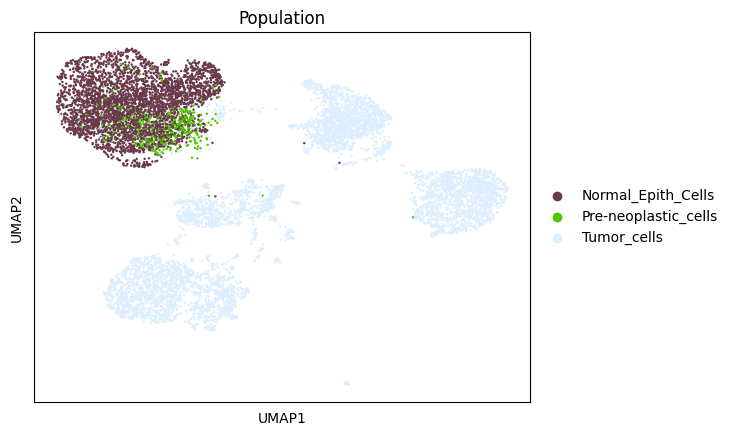

In [192]:
sc.pl.umap(adata_B, color = 'Stage')
sc.pl.umap(adata_B, color = 'orig.ident')
sc.pl.umap(adata_B, color = 'Population')

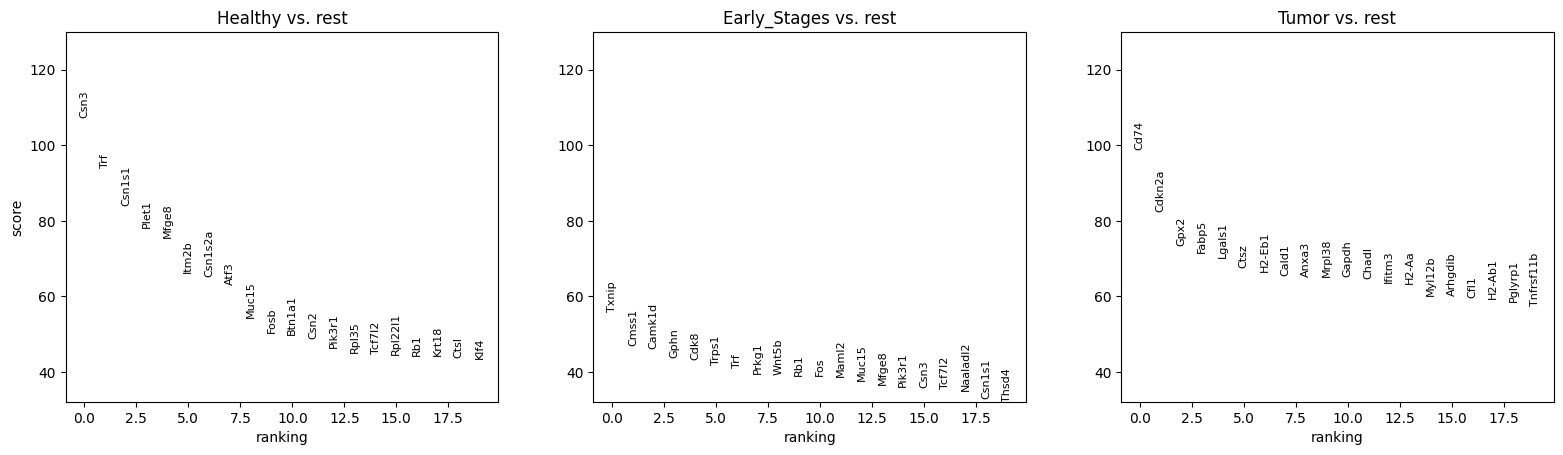

In [193]:
sc.tl.rank_genes_groups(adata_B, groupby="Stage")
sc.pl.rank_genes_groups(adata_B, groupby="Stage")